<a href="https://colab.research.google.com/github/fardsnog2/ML_vvsu/blob/main/Georgy_ml_vvsu_first_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd

In [108]:
df = pd.read_excel('/content/moviedb.xlsx').drop(columns=['Unnamed: 0'])
df['rating'] = df['rating'].apply(lambda x: 'Плохо' if x<=4.0 else 'Средний' if x>4.0 and x<7.0 else 'Отличный' if x>=7.0 else x)

In [109]:
df

,title,release,runtime,budget,revenue,lang,genre1,genre2,country1,country2,...,writer,studio1,studio2,keyword1,keyword2,keyword3,keyword4,keyword5,keyword6,rating
0,"""Vegeta"" (Shrek)",NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Плохо
1,'93: Del Soul,2021-07-18 00:00:00,15.0,250.0,NaN,en,детектив,триллер,NaN,NaN,...,Riley Lockhart,Elkman Productions,NaN,sports car,psychological stress,axe murder,horror filmmaking,1990s,carsploitation,Плохо
2,'Catch Me If You Can': Behind the Camera,2003-05-06 00:00:00,17.0,NaN,NaN,NaN,документальный,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Отличный
3,'Harry Potter': Behind the Magic,2005-11-19 00:00:00,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Отличный
4,"'Oh, Miss Jones!': The Very Best of Leonard Ro...",1996-08-16 00:00:00,52.0,NaN,NaN,en,документальный,NaN,GB,NaN,...,NaN,Telegram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Средний
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,Белфаст,2021-11-12 00:00:00,98.0,NaN,30000000.0,en,драма,NaN,GB,NaN,...,Kenneth Branagh,Northern Ireland Screen,TKBC,working class,black and white,"belfast, north ireland",1960s,NaN,NaN,Отличный
10278,Финч,2021-11-04 00:00:00,115.0,2500000.0,500000000.0,en,фантастика,драма,US,NaN,...,Ivor Powell,Amblin Entertainment,ImageMovers,robot,journey,humanity,post-apocalyptic,NaN,NaN,Отличный
10279,Под гипнозом,2021-10-27 00:00:00,88.0,NaN,NaN,en,триллер,драма,CA,NaN,...,Richard D'Ovidio,The Long Game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Средний
10280,Последняя дуэль,2021-10-13 00:00:00,152.0,100000000.0,27000000.0,en,боевик,драма,GB,US,...,NaN,20th Century Studios,Scott Free Productions,based on novel or book,"normandy, france",based on true story,knight,duel,historical,Отличный


In [110]:
df.describe()

,runtime,budget,revenue
count,10130.000000,4.119000e+03,4.113000e+03
mean,88.593287,3.986407e+07,1.177812e+08
std,40.281324,4.822654e+07,2.064450e+08
min,0.000000,1.000000e+00,1.000000e+00
25%,83.000000,7.500000e+06,9.128263e+06
50%,96.000000,2.200000e+07,4.266441e+07
75%,109.000000,5.200000e+07,1.293948e+08
max,840.000000,3.800000e+08,2.797801e+09


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10282 entries, 0 to 10281
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     10282 non-null  object 
 1   release   10020 non-null  object 
 2   runtime   10130 non-null  float64
 3   budget    4119 non-null   float64
 4   revenue   4113 non-null   float64
 5   lang      8972 non-null   object 
 6   genre1    9322 non-null   object 
 7   genre2    6558 non-null   object 
 8   country1  8748 non-null   object 
 9   country2  2102 non-null   object 
 10  actor1    9277 non-null   object 
 11  actor2    8992 non-null   object 
 12  actor3    8752 non-null   object 
 13  actor4    8539 non-null   object 
 14  actor5    8301 non-null   object 
 15  director  9575 non-null   object 
 16  writer    7052 non-null   object 
 17  studio1   7461 non-null   object 
 18  studio2   6172 non-null   object 
 19  keyword1  7201 non-null   object 
 20  keyword2  6398 non-null   ob

Удалим сразу те столбцы где менее 7![изображение_2024-02-25_201204648.png](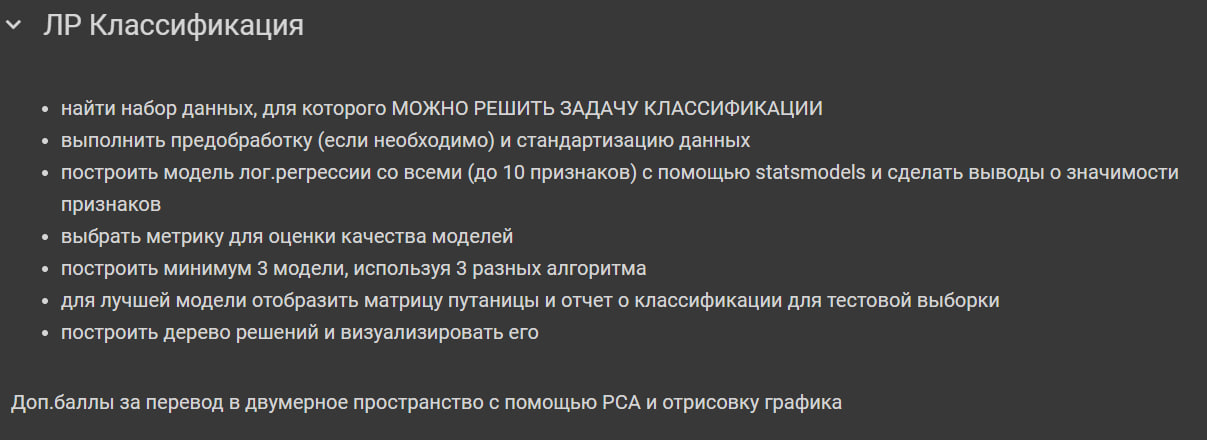![изображение_2024-02-25_201213139.png](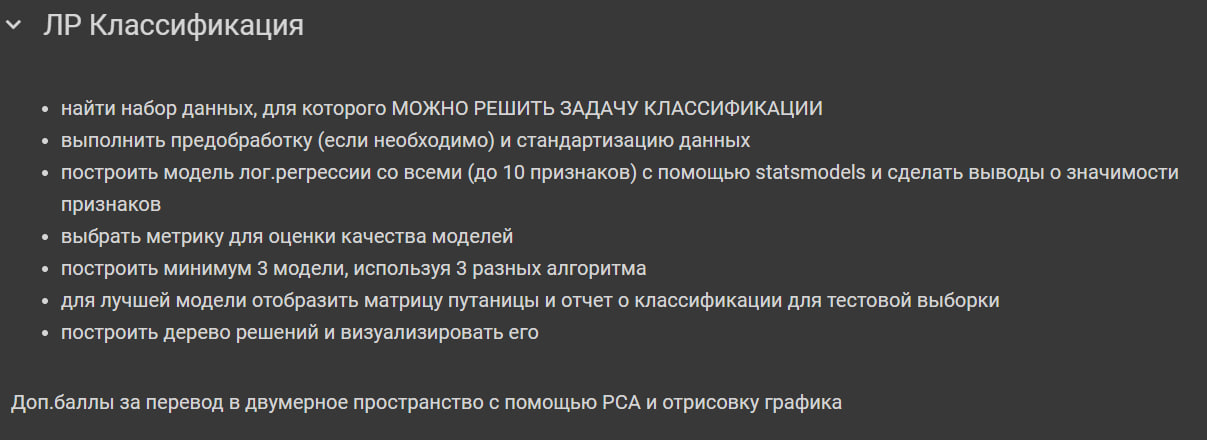![изображение_2024-02-25_201215206.png](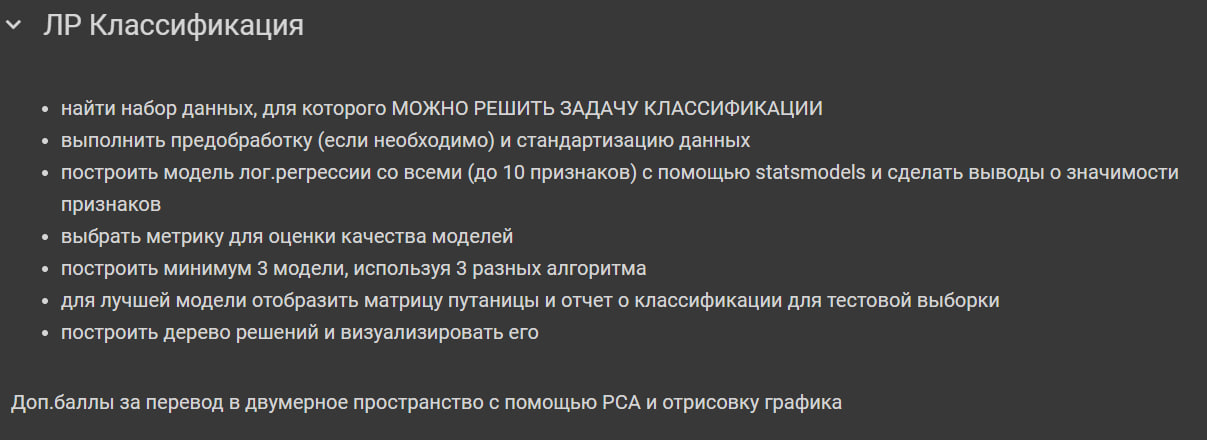![изображение_2024-02-25_201220005.png](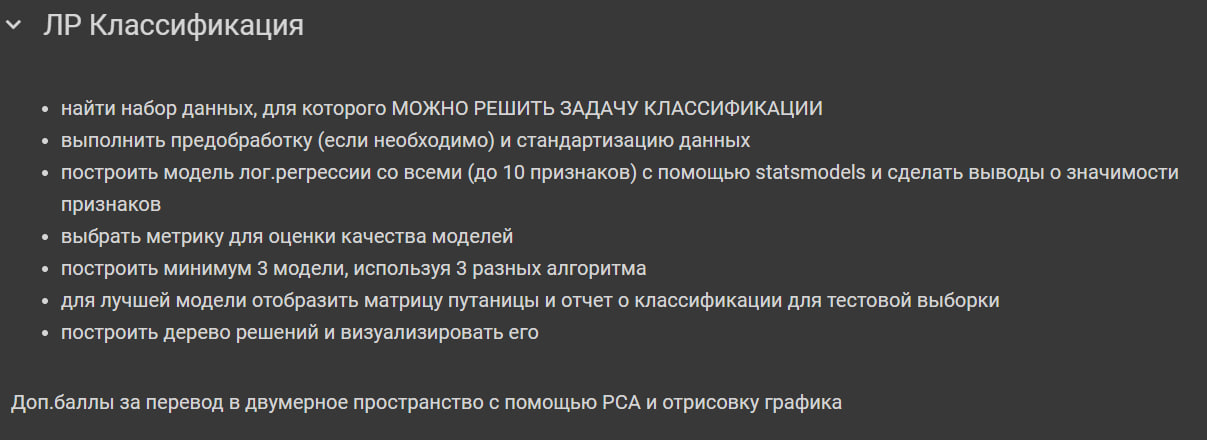![sid.jpg](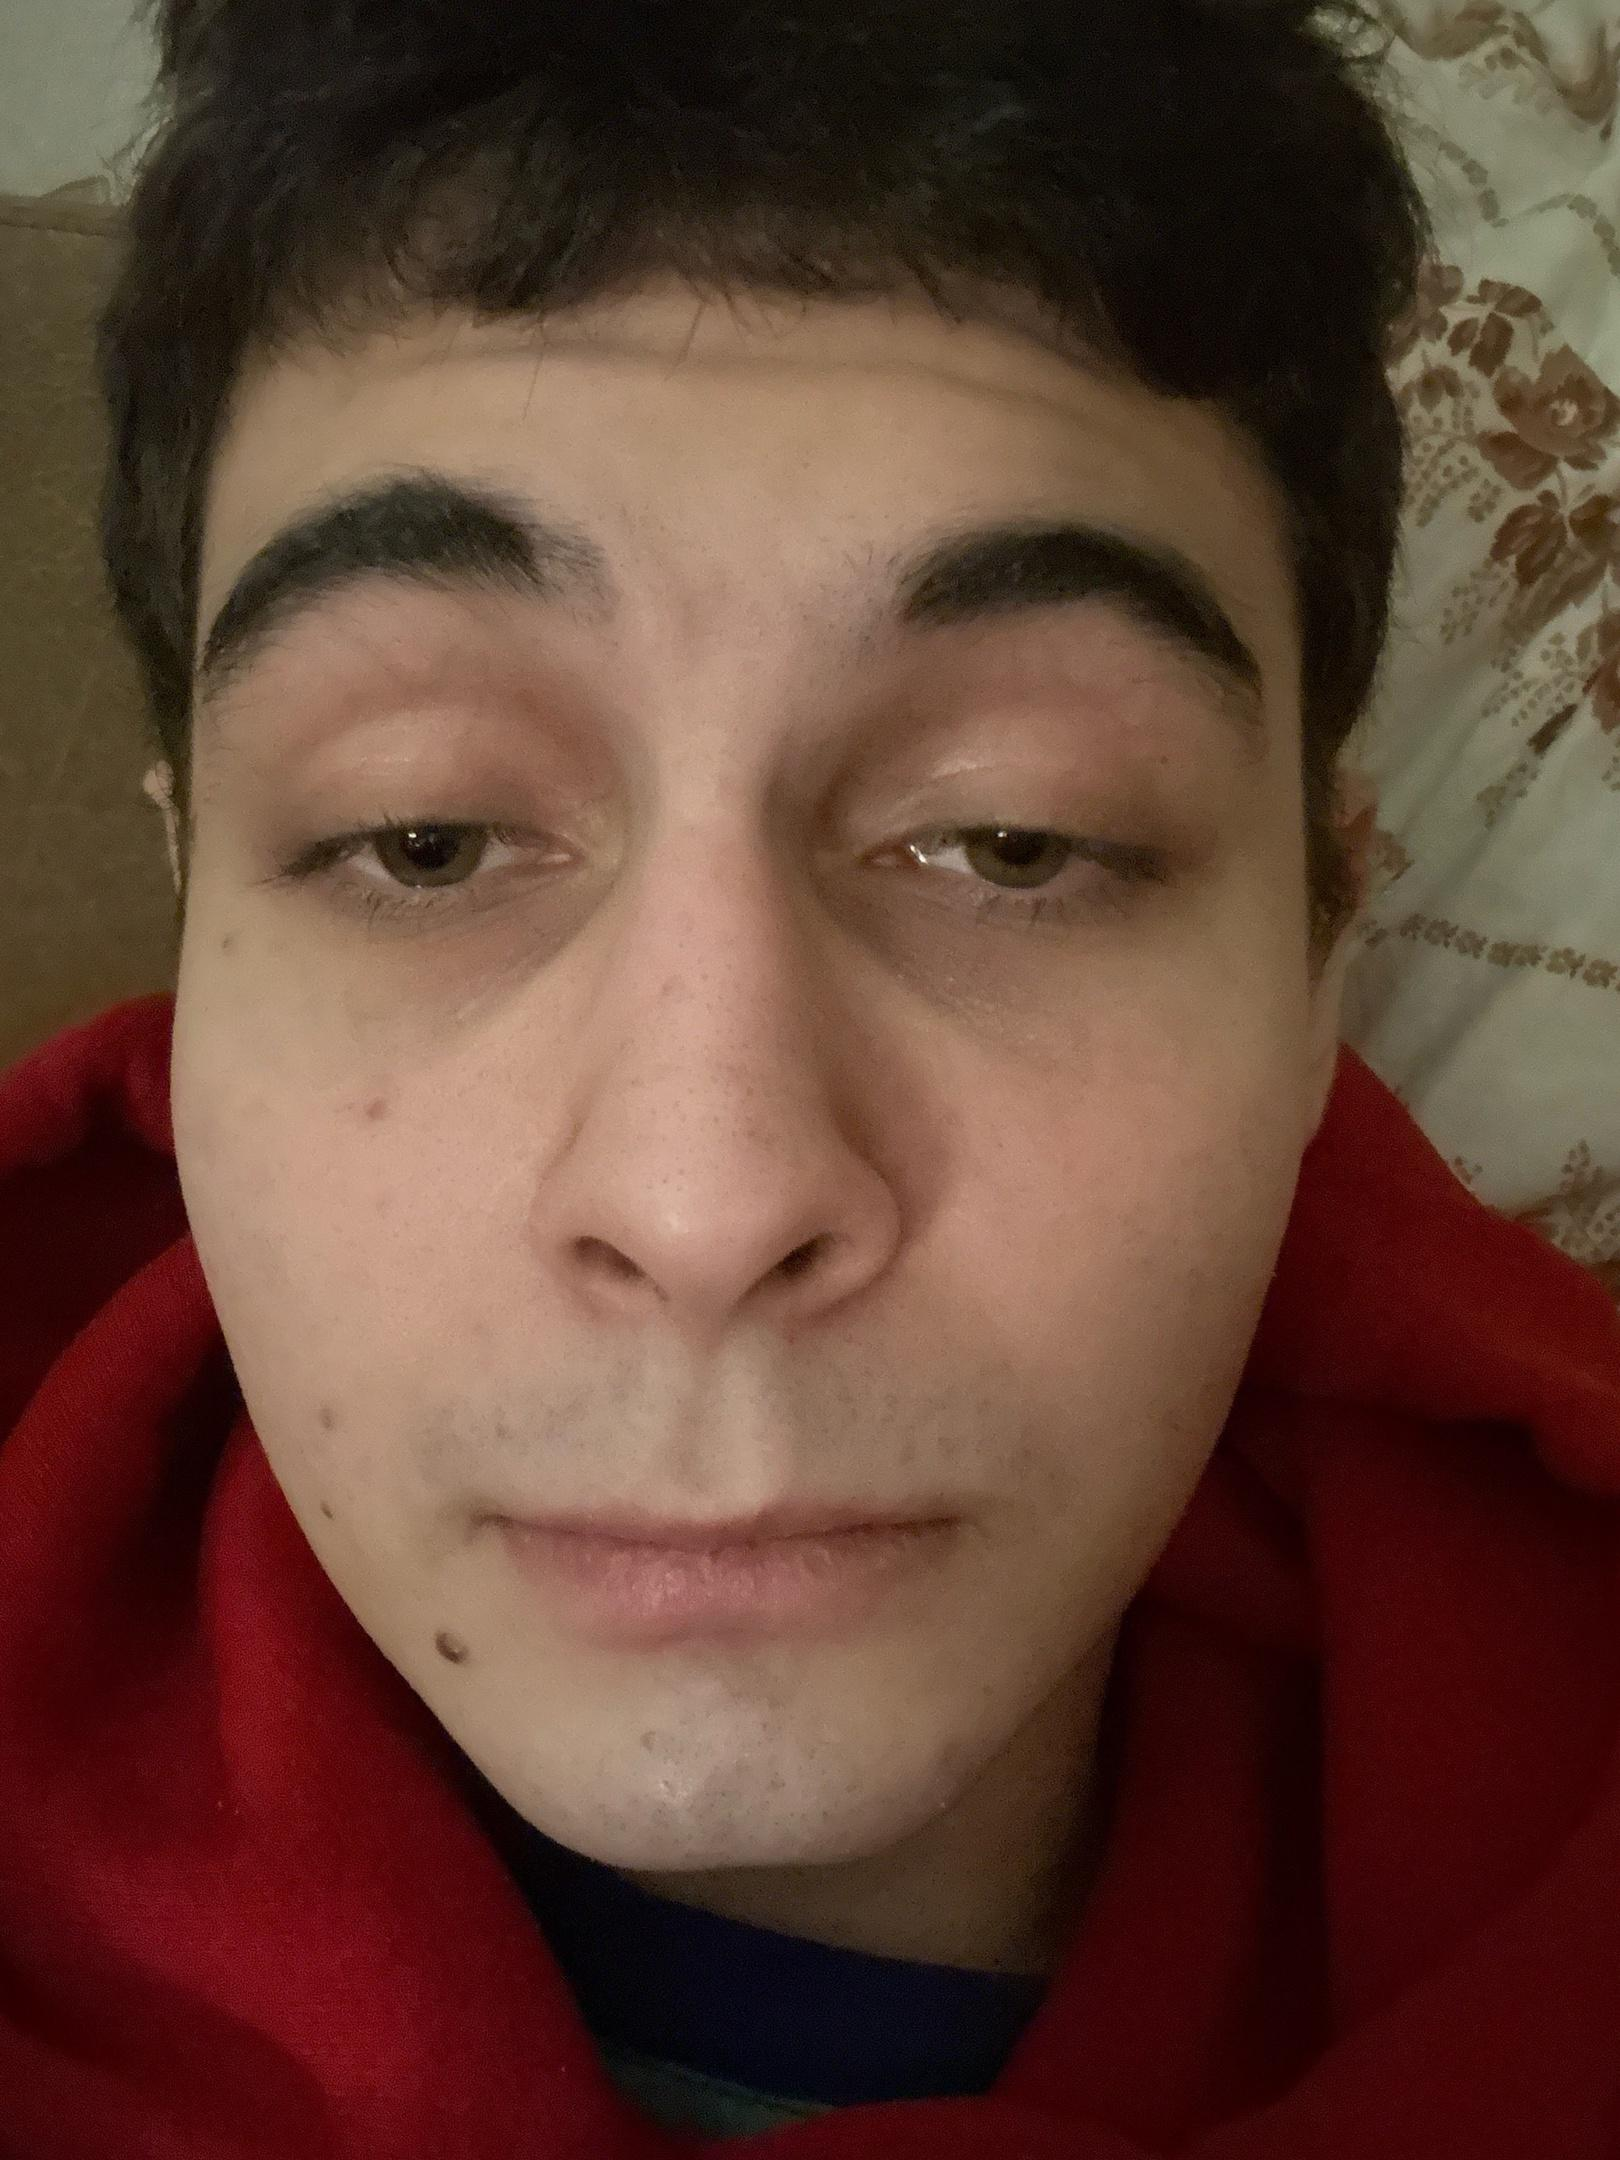![изображение_2024-02-25_201235199.png](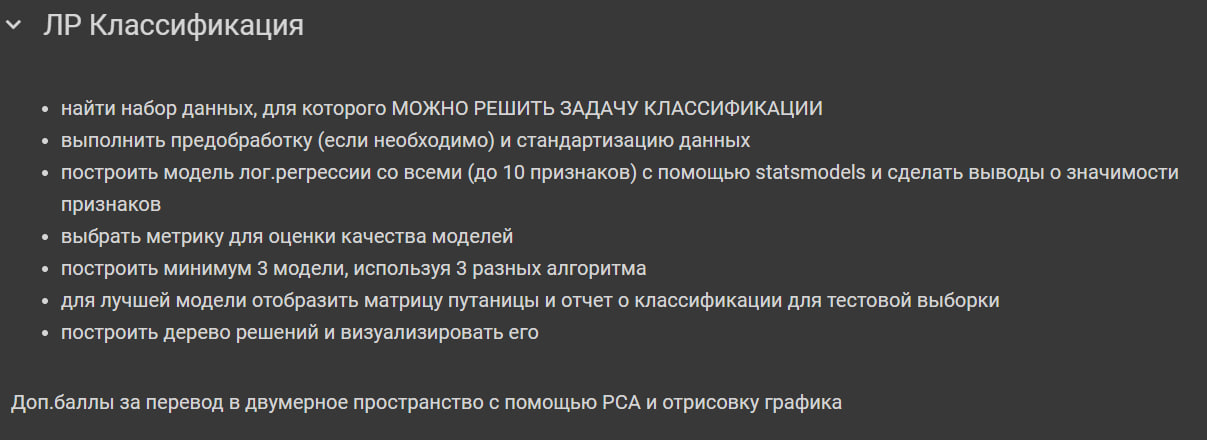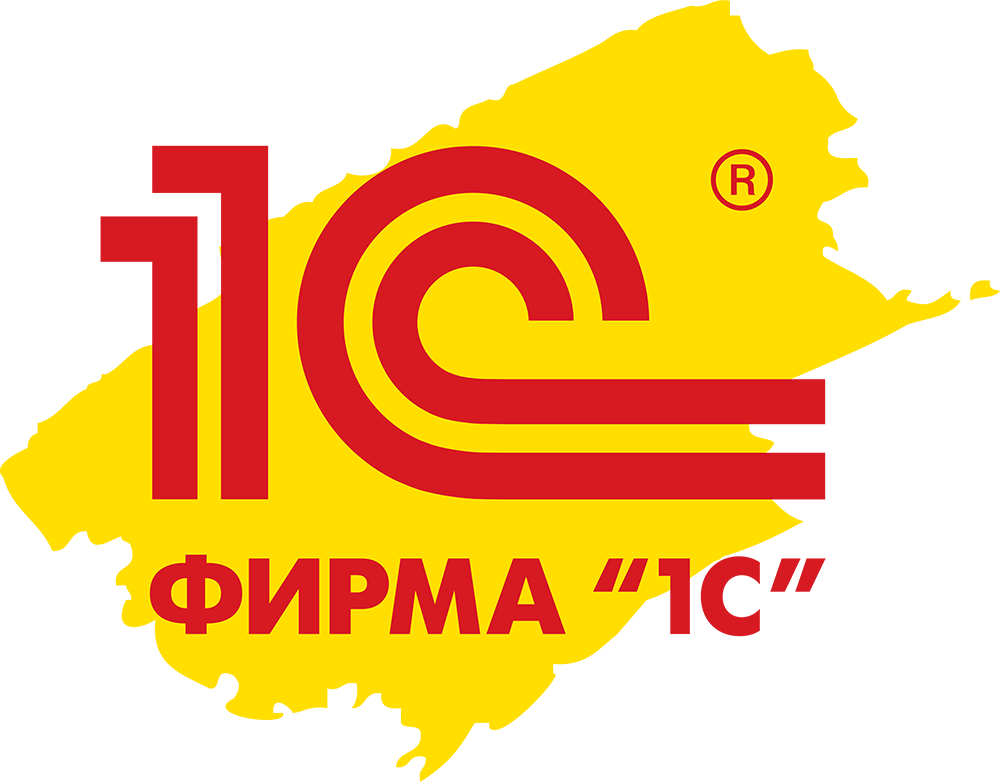))))))к не null значений,кроме бюджета и выручки

In [112]:
df_drop = df.drop(columns=['country2','keyword3','keyword4','keyword5','keyword6','genre2','studio2','keyword2'])
df_drop

,title,release,runtime,budget,revenue,lang,genre1,country1,actor1,actor2,actor3,actor4,actor5,director,writer,studio1,keyword1,rating
0,"""Vegeta"" (Shrek)",NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Плохо
1,'93: Del Soul,2021-07-18 00:00:00,15.0,250.0,NaN,en,детектив,NaN,Kylie Lockhart,Riley Lockhart,NaN,NaN,NaN,Riley Lockhart,Riley Lockhart,Elkman Productions,sports car,Плохо
2,'Catch Me If You Can': Behind the Camera,2003-05-06 00:00:00,17.0,NaN,NaN,NaN,документальный,NaN,Frank Abagnale Jr.,Steven Spielberg,Tom Hanks,Leonardo DiCaprio,Amy Adams,Laurent Bouzereau,NaN,NaN,NaN,Отличный
3,'Harry Potter': Behind the Magic,2005-11-19 00:00:00,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Отличный
4,"'Oh, Miss Jones!': The Very Best of Leonard Ro...",1996-08-16 00:00:00,52.0,NaN,NaN,en,документальный,GB,Leonard Rossiter,John Barron,Sue Nicholls,Tim Preece,Bruce Bould,Will Trotter,NaN,Telegram,NaN,Средний
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,Белфаст,2021-11-12 00:00:00,98.0,NaN,30000000.0,en,драма,GB,Jude Hill,Caitríona Balfe,Jamie Dornan,Judi Dench,Ciarán Hinds,Kenneth Branagh,Kenneth Branagh,Northern Ireland Screen,working class,Отличный
10278,Финч,2021-11-04 00:00:00,115.0,2500000.0,500000000.0,en,фантастика,US,Tom Hanks,Caleb Landry Jones,Oscar Avila,Lora Martinez-Cunningham,Marie Wagenman,Miguel Sapochnik,Ivor Powell,Amblin Entertainment,robot,Отличный
10279,Под гипнозом,2021-10-27 00:00:00,88.0,NaN,NaN,en,триллер,CA,Kate Siegel,Jason O'Mara,Dulé Hill,Lucie Guest,Jaime M. Callica,Matt Angel,Richard D'Ovidio,The Long Game,NaN,Средний
10280,Последняя дуэль,2021-10-13 00:00:00,152.0,100000000.0,27000000.0,en,боевик,GB,Matt Damon,Adam Driver,Jodie Comer,Harriet Walter,Ben Affleck,Ridley Scott,NaN,20th Century Studios,based on novel or book,Отличный


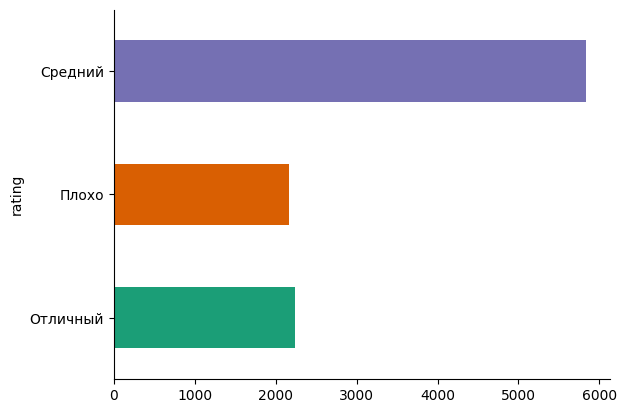

In [113]:
# @title rating

from matplotlib import pyplot as plt
import seaborn as sns
df_drop.groupby('rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

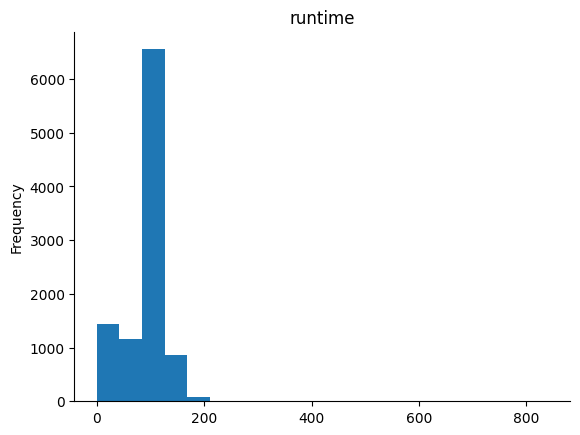

In [114]:
# @title runtime

from matplotlib import pyplot as plt
df_drop['runtime'].plot(kind='hist', bins=20, title='runtime')
plt.gca().spines[['top', 'right',]].set_visible(False)

так же стоит удалить актеров3-5 м название релиз
хочу оставить только бюджет, выручку, длительность и жанр, чтобы предсказать рейтинг так как выдвину гипотезу что рейтинг можно пресказать по этим данным

In [115]:
df_drop = df_drop.drop(columns = ['actor3','actor4','actor5','title'])
df_drop= df_drop.drop(columns = ['release'])
df_drop= df_drop.drop(columns = ['studio1','lang','country1','actor1','actor2','director','writer'])
df_drop= df_drop.drop(columns = ['keyword1'])

In [116]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10282 entries, 0 to 10281
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   runtime  10130 non-null  float64
 1   budget   4119 non-null   float64
 2   revenue  4113 non-null   float64
 3   genre1   9322 non-null   object 
 4   rating   10240 non-null  object 
dtypes: float64(3), object(2)
memory usage: 401.8+ KB


In [117]:
df_drop.genre1.fillna(df_drop.genre1.mode(), inplace = True)

In [118]:
df_drop

,runtime,budget,revenue,genre1,rating
0,99.0,NaN,NaN,драма,Плохо
1,15.0,250.0,NaN,детектив,Плохо
2,17.0,NaN,NaN,документальный,Отличный
3,48.0,NaN,NaN,NaN,Отличный
4,52.0,NaN,NaN,документальный,Средний
...,...,...,...,...,...
10277,98.0,NaN,30000000.0,драма,Отличный
10278,115.0,2500000.0,500000000.0,фантастика,Отличный
10279,88.0,NaN,NaN,триллер,Средний
10280,152.0,100000000.0,27000000.0,боевик,Отличный


для жанра использую моду для бюджета и выручки медиану

In [127]:
df_drop.budget.fillna(df_drop.budget.median(),inplace=True)
df_drop.revenue.fillna(df_drop.revenue.median(),inplace=True)
df_drop.runtime.fillna(df_drop.runtime.median(),inplace=True)
df_drop.genre1.fillna(df_drop.genre1.mode(),inplace=True)

In [129]:
df_drop.genre1.fillna('драма')

0                 драма
1              детектив
2        документальный
3                 драма
4        документальный
              ...      
10277             драма
10278        фантастика
10279           триллер
10280            боевик
10281             драма
Name: genre1, Length: 10282, dtype: object

In [130]:
df_drop['genre1'].isna().sum()

959

In [131]:
df_drop.describe()

,runtime,budget,revenue
count,10282.000000,1.028200e+04,1.028200e+04
mean,88.702782,2.915640e+07,7.271259e+07
std,39.992436,3.175252e+07,1.356485e+08
min,0.000000,1.000000e+00,1.000000e+00
25%,83.000000,2.200000e+07,4.266441e+07
50%,96.000000,2.200000e+07,4.266441e+07
75%,109.000000,2.200000e+07,4.266441e+07
max,840.000000,3.800000e+08,2.797801e+09


In [132]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10282 entries, 0 to 10281
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   runtime  10282 non-null  float64
 1   budget   10282 non-null  float64
 2   revenue  10282 non-null  float64
 3   genre1   9323 non-null   object 
 4   rating   10240 non-null  object 
dtypes: float64(3), object(2)
memory usage: 401.8+ KB


In [124]:
df_drop.dropna(subset=['genre1'])
df_drop

,runtime,budget,revenue,genre1,rating
0,99.0,NaN,NaN,драма,Плохо
1,15.0,250.0,NaN,детектив,Плохо
2,17.0,NaN,NaN,документальный,Отличный
3,48.0,NaN,NaN,NaN,Отличный
4,52.0,NaN,NaN,документальный,Средний
...,...,...,...,...,...
10277,98.0,NaN,30000000.0,драма,Отличный
10278,115.0,2500000.0,500000000.0,фантастика,Отличный
10279,88.0,NaN,NaN,триллер,Средний
10280,152.0,100000000.0,27000000.0,боевик,Отличный


In [125]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10282 entries, 0 to 10281
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   runtime  10130 non-null  float64
 1   budget   4119 non-null   float64
 2   revenue  4113 non-null   float64
 3   genre1   9323 non-null   object 
 4   rating   10240 non-null  object 
dtypes: float64(3), object(2)
memory usage: 401.8+ KB


In [133]:
df_drop['genre1'] = df_drop['genre1']. fillna ('драма')

In [134]:
df_drop

,runtime,budget,revenue,genre1,rating
0,99.0,22000000.0,42664410.0,драма,Плохо
1,15.0,250.0,42664410.0,детектив,Плохо
2,17.0,22000000.0,42664410.0,документальный,Отличный
3,48.0,22000000.0,42664410.0,драма,Отличный
4,52.0,22000000.0,42664410.0,документальный,Средний
...,...,...,...,...,...
10277,98.0,22000000.0,30000000.0,драма,Отличный
10278,115.0,2500000.0,500000000.0,фантастика,Отличный
10279,88.0,22000000.0,42664410.0,триллер,Средний
10280,152.0,100000000.0,27000000.0,боевик,Отличный


In [136]:
df_drop=df_drop.dropna(subset=['rating'])

In [137]:
df_drop

,runtime,budget,revenue,genre1,rating
0,99.0,22000000.0,42664410.0,драма,Плохо
1,15.0,250.0,42664410.0,детектив,Плохо
2,17.0,22000000.0,42664410.0,документальный,Отличный
3,48.0,22000000.0,42664410.0,драма,Отличный
4,52.0,22000000.0,42664410.0,документальный,Средний
...,...,...,...,...,...
10277,98.0,22000000.0,30000000.0,драма,Отличный
10278,115.0,2500000.0,500000000.0,фантастика,Отличный
10279,88.0,22000000.0,42664410.0,триллер,Средний
10280,152.0,100000000.0,27000000.0,боевик,Отличный


In [138]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10240 entries, 0 to 10281
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   runtime  10240 non-null  float64
 1   budget   10240 non-null  float64
 2   revenue  10240 non-null  float64
 3   genre1   10240 non-null  object 
 4   rating   10240 non-null  object 
dtypes: float64(3), object(2)
memory usage: 480.0+ KB


In [139]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [140]:
X=df_drop.drop(columns=['rating'])
Y = df_drop['rating']

In [ ]:
pd.get_dummies(X)